<a href="https://colab.research.google.com/github/cagBRT/Recommendation-Systems/blob/main/Recommender_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# Clone the entire repo.
%cd /content/
!git clone  https://github.com/cagBRT/Recommendation-Systems.git cloned-repo
%cd cloned-repo

/content
Cloning into 'cloned-repo'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 77.44 KiB | 1.43 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/content/cloned-repo


Download dataset here:<br>

https://huggingface.co/spaces/Kamand/Movie_Recommendation/blob/main/movies_metadata.csv<br>

Click on the download button (lower left side)

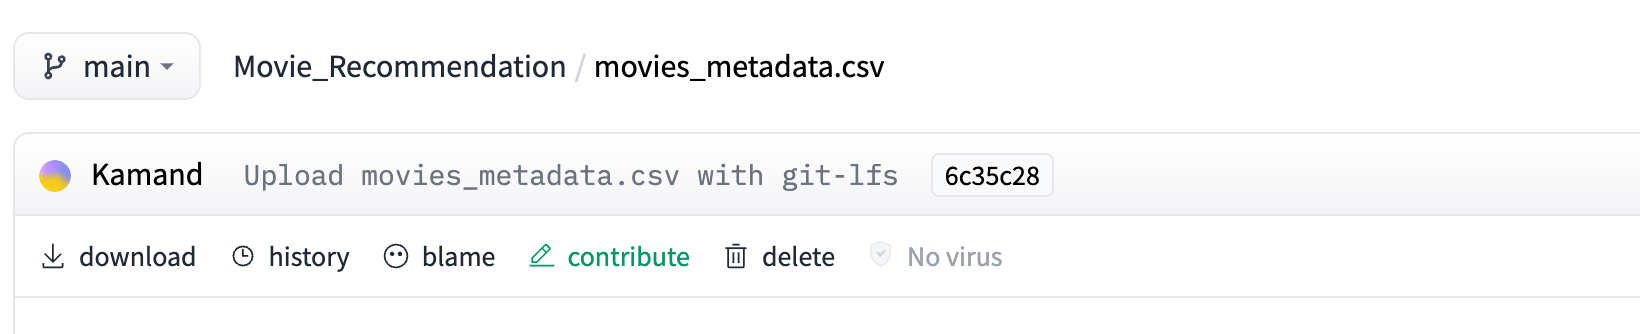

In [4]:
from IPython.display import Image
Image("Download.png" , width=700)

Upload the file **movies_metadata.csv**

In [24]:
# Import Pandas
import pandas as pd

# Load Movies Metadata
metadata = pd.read_csv('/content/movies_metadata.csv', low_memory=False, error_bad_lines=False)

# Print the first three rows
metadata.head(3)

<ipython-input-24-b490a01dc92a>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  metadata = pd.read_csv('/content/movies_metadata.csv', low_memory=False, error_bad_lines=False)
Skipping line 2684: expected 24 fields, saw 32
Skipping line 6665: expected 24 fields, saw 30
Skipping line 8125: expected 24 fields, saw 27
Skipping line 12125: expected 24 fields, saw 31
Skipping line 13547: expected 24 fields, saw 35
Skipping line 14843: expected 24 fields, saw 35
Skipping line 17622: expected 24 fields, saw 43
Skipping line 19026: expected 24 fields, saw 34
Skipping line 21801: expected 24 fields, saw 27
Skipping line 23089: expected 24 fields, saw 26
Skipping line 24541: expected 24 fields, saw 28
Skipping line 27371: expected 24 fields, saw 30
Skipping line 28703: expected 24 fields, saw 34
Skipping line 32896: expected 24 fields, saw 27
Skipping line 34251: expected 24 fields, saw 30
Skipping li

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [25]:
# Calculate mean of vote average column
C = metadata['vote_average'].mean()
print(C)

5.513696283607656


In [26]:
# Calculate the minimum number of votes required to be in the chart, m
m = metadata['vote_count'].quantile(0.90)
print(m)

110.0


In [27]:
# Filter out all qualified movies into a new DataFrame
q_movies = metadata.copy().loc[metadata['vote_count'] >= m]
q_movies.shape


(6750, 24)

In [28]:
metadata.shape


(67152, 24)

In [29]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)


In [30]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)


In [32]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(20)


,title,vote_count,vote_average,score
21844,Dilwale Dulhania Le Jayenge,661.0,9.1,8.588335
314,The Shawshank Redemption,8358.0,8.5,8.461208
834,The Godfather,6024.0,8.5,8.446447
25466,The Dark Knight,12269.0,8.3,8.275241
5693,Fight Club,9678.0,8.3,8.268687
292,Pulp Fiction,8670.0,8.3,8.265092
522,Schindler's List,4436.0,8.3,8.232580
45359,Whiplash,4376.0,8.3,8.231678
11240,Spirited Away,3968.0,8.3,8.224842
3619,Life Is Beautiful,3643.0,8.3,8.218334


Content based recommender

In [33]:
#Print plot overviews of the first 5 movies.
metadata['overview'].head()


0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [34]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
metadata['overview'] = metadata['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(metadata['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(67152, 75827)

In [35]:
#Array mapping from feature integer indices to feature name.
tfidf.get_feature_names_out()[5000:5010]

array(['availability', 'available', 'avails', 'avaks', 'avalanche',
       'avalanches', 'avallone', 'avalon', 'avant', 'avanthika'],
      dtype=object)

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim.shape


In [ ]:
cosine_sim[1]


In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()


In [ ]:
indices[:10]


In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]


In [ ]:

get_recommendations('The Dark Knight Rises')

